# Исследование рынка заведений общественного питания в Москве

Задача  

    Планируется открыть новое кофе в Москве, отличительной чертой которого будет облуживание посетителей роботами. Необходимо провести исследование текущего положения дел на рынке заведений общественного питания в Москве c целью анализа конкурентов нового кафе.

Имеющиеся данные: 
* файл с данными о заведениях общественного питания в Москве;
* список улиц и районов Москвы с сайта opengovdata


### План работ
0. [Глобальные настройки](#step0)
1. [Шаг 1. Загрузка и предобработка данных](#step1)  
2. [Шаг 2. Исследовательский анализ данных](#step2)  
    2.1 [Исследуйте соотношение видов объектов общественного питания по количеству](#step2.1)    
    2.2 [Исследуйте соотношение сетевых и несетевых заведений по количеству](#step2.2)  
    2.3 [Для какого вида объекта общественного питания характерно сетевое распространение?](#step2.3)  
    2.4 [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#step2.4)  
    2.5 [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?](#step2.5)    
    2.6 [Выделите в отдельный столбец информацию об улице из столбца address](#step2.6)  
    2.7 [Постройте график топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?](#step2.7)  
    2.8 [Найдите число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?](#step2.8)  
    2.9 [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#step2.9)  
3. [Шаг 3. Общий вывод](#step3)  
4. [Презентация](#step4)

<a id='step0'></a>
## Глобальные настройки 

In [1]:
# Устновка библиотеки для отрисовки координат на графике
!pip install folium

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np

# Построение графиков
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median 

# Загрузка документа из Google Таблиц
from io import BytesIO

# Запросы к геокодеру Яндекса
import requests
from bs4 import BeautifulSoup

# Отрисовка меток на карте
import folium

In [3]:
# Установка единой темы для всех графиков
sns.set_style('whitegrid')

<a id='step1'></a>
## Шаг 1. Загрузка и предобработка данных

In [4]:
df = pd.read_csv('rest_data.csv')

In [5]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [6]:
# Общая инаформация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [7]:
# Приведение к нижнему регистру значений в столбце object_name для проверки дубликатов
df['object_name'] = df['object_name'].str.lower()

In [8]:
# Проверка дубликтов по всем столбцам
df.duplicated().sum()

0

In [9]:
# Проверка дубликтов без учета идентификатора и количества посадочных мест
df[df.duplicated(['object_name', 'address', 'object_type'])].sort_values(by = 'object_name').head(10)

,id,object_name,chain,object_type,address,number
8005,154087,eat and talk,нет,ресторан,"город Москва, улица Воздвиженка, дом 4/7, стро...",10
6372,135231,il patio,нет,ресторан,"город Москва, Манежная площадь, дом 1, строение 2",45
13858,209723,laltro bosco,нет,ресторан,"город Москва, улица Петровка, дом 10",145
12732,192921,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",3
5069,20025,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
5068,20024,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
5067,20023,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
5066,20022,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
5060,20015,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",40
5059,20021,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20


In [10]:
# Доля дубликатов от общего числа строк в таблице
len(df[df.duplicated(['object_name', 'address', 'object_type'])]) / len(df)

0.011974489131849538

In [11]:
# Проверка дублей на примере
df[df['object_name'] == 'lift']

,id,object_name,chain,object_type,address,number
5057,20018,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",25
5058,20019,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
5059,20021,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
5060,20015,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",40
5064,20012,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",30
5066,20022,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
5067,20023,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
5068,20024,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
5069,20025,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
12731,192931,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",5


Похоже, что в таблице есть дубликаты заведений, но данные дубликаты имеют разные идентификаторы и разное количество мест.  
Возможно, заведение проходило перерегистрацию или данные в источнике некорректные. Разное количество мест может также объясняться наличием нескольких залов в заведении. В любом случае, от таких данных лучше избавиться.

In [12]:
#  Удаление дубликатов, оставляем заведение с максимальным идентификатором
df = df.sort_values('id').drop_duplicates(['object_name', 'address', 'object_type'], keep='last')

In [13]:
# Проверка
df.duplicated(['object_name', 'address', 'object_type']).sum()

0

In [14]:
# Проверка значений в столбце с флагом принадлежности ресторана к сети
df['chain'].unique()

array(['да', 'нет'], dtype=object)

In [15]:
# Проверка значений в столбце с типом заведений
df['object_type'].unique()

array(['кафе', 'бар', 'предприятие быстрого обслуживания', 'буфет',
       'столовая', 'ресторан', 'закусочная', 'кафетерий',
       'магазин (отдел кулинарии)'], dtype=object)

In [16]:
# Проверка распределения значений в столбце с количеством посадочных мест
df['number'].describe()

count    15182.000000
mean        59.893953
std         74.969907
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

**Вывод**   
Были найдены дубликаты заведений с разными идентификаторами (около 1%), дубликаты были удалены.  
В остальном, данные в таблице чистые - не найдено пустых значений и аномалий.  

<a id='step2'></a>
## Шаг 2. Исследовательский анализ данных

In [17]:
# Исходная таблица
df.head()

,id,object_name,chain,object_type,address,number
1611,838,темпл бар,да,кафе,"город Москва, Первомайская улица, дом 33",356
3290,5882,кафе «эссе»,нет,кафе,"город Москва, Никитинская улица, дом 13А",70
3404,19613,бар азбука вкуса,да,бар,"город Москва, Мичуринский проспект, дом 22, ко...",6
1558,19618,кафе «галладенс»,нет,кафе,"город Москва, Мичуринский проспект, дом 21, ко...",25
6787,19619,бар-фитнес,нет,бар,"город Москва, Пятницкое шоссе, дом 29, корпус 5",24


<a id='step2.1'></a>
###  1. Исследуйте соотношение видов объектов общественного питания по количеству

In [18]:
# Сокращение названий типов заведений для красивого отображения на графиках
df['object_type'].replace({'предприятие быстрого обслуживания': 'фастфуд', 'магазин (отдел кулинарии)' : 'кулинария в магазине'}, inplace = True)

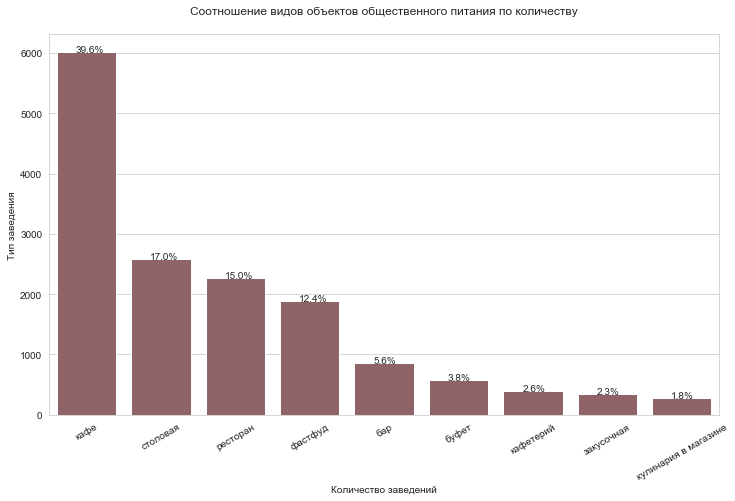

In [19]:
# Построение графика соотношения видов объектов общественного питания по количеству

# Настройка фигуры
plt.figure(figsize=(12,7))

object_types_count = df['object_type'].value_counts().sort_values(ascending = False)
ax = sns.barplot(x = object_types_count.index, y = object_types_count, color  = '#965d62')

total = len(df)
for p in ax.patches:
        percentage = '{:.1%}'.format(p.get_height()/total)
        x = p.get_x() + p.get_width()/3.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

# Настройка графика        
plt.title('Cоотношение видов объектов общественного питания по количеству', pad = 20)         
plt.xlabel('Количество заведений')     
plt.xticks(rotation = 30)         
plt.ylabel('Тип заведения')
plt.show()

С сильным отрывом по количеству лидируют заведения типа "кафе", также в топ 4 входят заведения типа столовая, ресторан и фастфуд.   
Остальных типов заведений значительно меньше.

<a id='step2.2'></a>
### 2. Исследуйте соотношение сетевых и несетевых заведений по количеству

In [20]:
# Кол-во сетевых и несетвых заведений
chain_flag = df['chain'].value_counts()

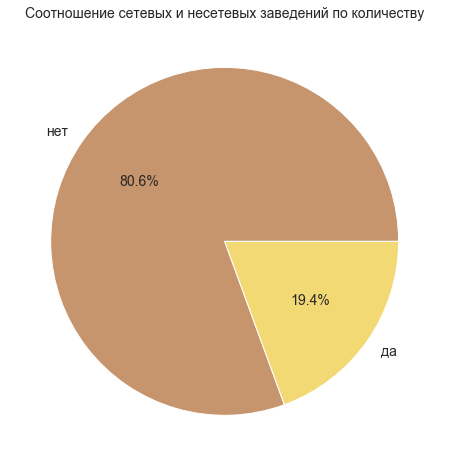

In [21]:
# Построение графика соотношения числа сетевых и несетевых заведений

# Настройка фигуры
plt.figure(figsize=(10,8))

plt.pie(x = chain_flag, labels = chain_flag.index,  autopct='%1.1f%%', 
        colors = ['#c7956d', '#f2d974'], textprops={'fontsize': 14})
plt.title('Cоотношение сетевых и несетевых заведений по количеству', fontsize = 14)         
plt.show()

Несетевых заведений больше в четыре раза, чем сетевых

<a id='step2.'></a>
### 3. Для какого вида объекта общественного питания характерно сетевое распространение?

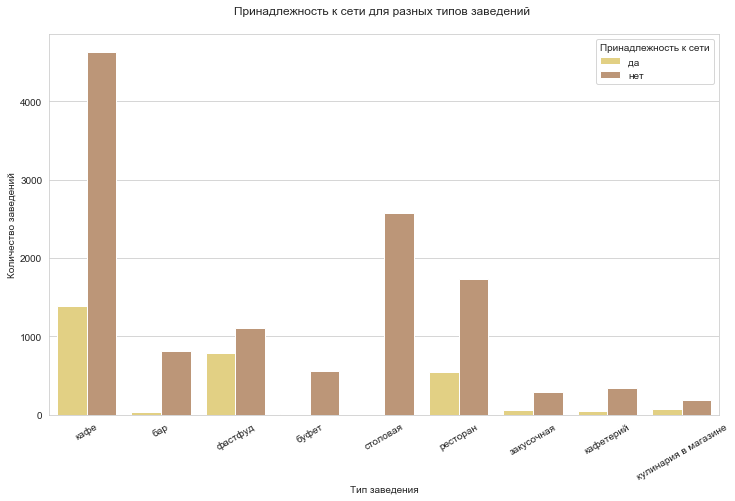

In [22]:
# Построение графика соотношения сетевых к несетевым заведениям в разбивке по типу объекта

# Настройки фигуры 
plt.figure(figsize=(12, 7))
palette ={"да": "#f2d974", "нет": "#c7956d"}

ax = sns.countplot(data = df, x = 'object_type', hue = 'chain', palette = palette);
 
# Настройка графика            
plt.title('Принадлежность к сети для разных типов заведений ', pad = 20)
plt.xlabel('Тип заведения')         
plt.xticks(rotation=30)
plt.ylabel('Количество заведений')

# Настройка легенды
plt.legend(title = 'Принадлежность к сети')
leg = ax.get_legend()
leg._legend_box.align = 'left'


plt.show()

Для всех типов заведений более характерно несетевое распространение.  
Однко, можно заметить, что для типа заведений фастфуд более характерно сетевое распростронение, чем для других (с учетом общего числа заведений).   
Посмотрим на отношение сетевых заведений к общему числу заведений для каждого типа объекта.
  

In [23]:
# Количество сетевых и несетевых заведений для каждого типа объекта
chain_pivot = df.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc = 'count')
chain_pivot.columns = ['chain', 'not_chain']

In [24]:
# Общее количество заведений по типам объектов
chain_pivot['total'] = chain_pivot['chain'] + chain_pivot['not_chain']

In [25]:
# Доля сетевых заведений от общего числа заведений
chain_pivot['chain_rate'] = chain_pivot['chain'] / chain_pivot['total']

In [26]:
# Сортировка по убыванию доли сетевых кафе
chain_pivot = chain_pivot.sort_values(by = 'chain_rate', ascending = False).reset_index()

In [27]:
chain_pivot.head()

,object_type,chain,not_chain,total,chain_rate
0,фастфуд,784,1106,1890,0.414815
1,кулинария в магазине,78,194,272,0.286765
2,ресторан,541,1733,2274,0.237907
3,кафе,1387,4621,6008,0.230859
4,закусочная,56,291,347,0.161383


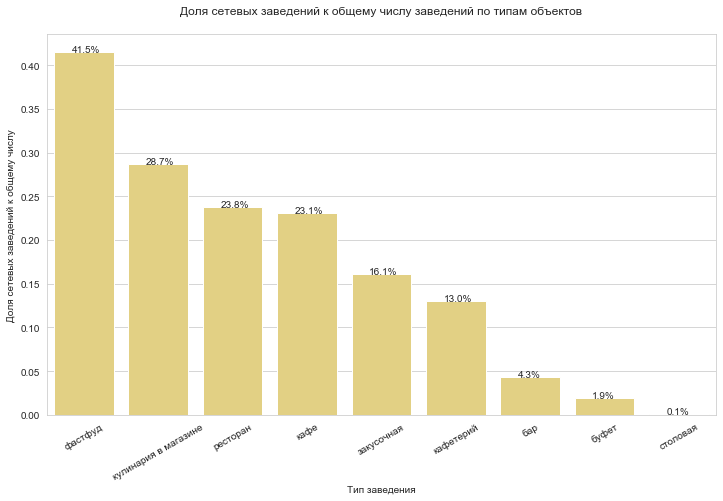

In [28]:
# Построение графика отношения количества сетевых заведений к общему числу заведений

# Настройка фигуры
plt.figure(figsize=(12, 7))
palette = {"да": "#f2d974", "нет": "#c7956d"}

ax = sns.barplot(data = chain_pivot, 
                 x = 'object_type',
                 y = 'chain_rate', color = '#f2d974')

# Расчет процентов
for p in ax.patches:
        percentage = '{:.1%}'.format(p.get_height())
        x = p.get_x() + p.get_width()/3.4
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
          
# Настройка графика
plt.title('Доля сетевых заведений к общему числу заведений по типам объектов', pad = 20)
plt.xlabel('Тип заведения')         
plt.xticks(rotation=30)
plt.ylabel('Доля сетевых заведений к общему числу')

plt.show()

Данный график подтверждает вывод о том, что сетевое распространение характерно для заведений типа фастфуд (более 40% заведений принадлежат сетям).  
Абсолютно не характерно сетевое распространение для заведений типа бар, буфет и столовая.

<a id='step2.4'></a>
### 4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [29]:
# Выделение заведений, принадлежащих сетям и группировка по названию сети
df_chain = df[df['chain'] == 'да'].groupby('object_name').agg({'id':'count', 'number': 'median'})
df_chain.columns = ['count', 'number']

In [30]:
df_chain.sort_values(by = 'count', ascending = False).head()

,count,number
object_name,,
kfc,155,45.0
шоколадница,154,50.0
макдоналдс,148,79.0
бургер кинг,136,45.0
теремок,94,23.0


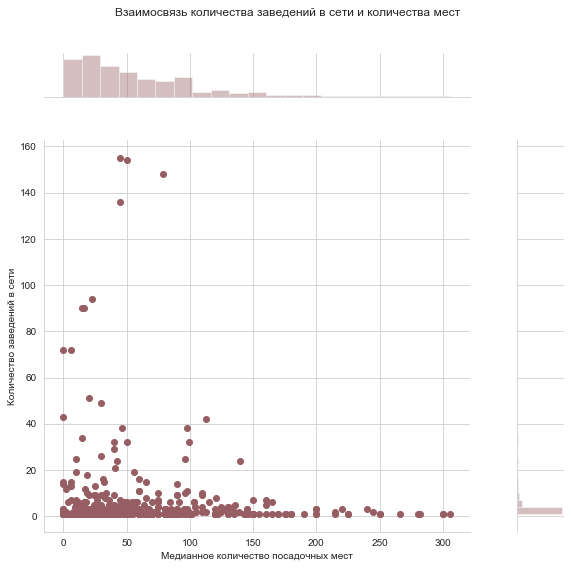

In [31]:
# Построение графика взаимосвязи количества заведений в сети и количества мест

ax = sns.jointplot(x = 'number', y='count', data = df_chain, 
                   height = 8, color = '#965d62', space = 1)

# Настройки графика
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Взаимосвязь количества заведений в сети и количества мест')
ax.set_axis_labels('Медианное количество посадочных мест', 'Количество заведений в сети')
     
plt.show()

Можно отметить, что для сетевых завдений более характерно мало заведений с большим количеством посадочных мест, чем много заведений с малым количеством посадочных мест.  
Также можно заметить, что у нас есть значения количества заведений в сети = 1. Это может быть связано с тем, что остальные заведений сети находятся в других городах, или, возможно, это вообще международная сеть и в Москве всего один объект сети, поэтому удалять такие заведения нельзя.

<a id='step2.5'></a>
### 5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест.  Какой вид предоставляет в среднем самое большое количество посадочных мест? 

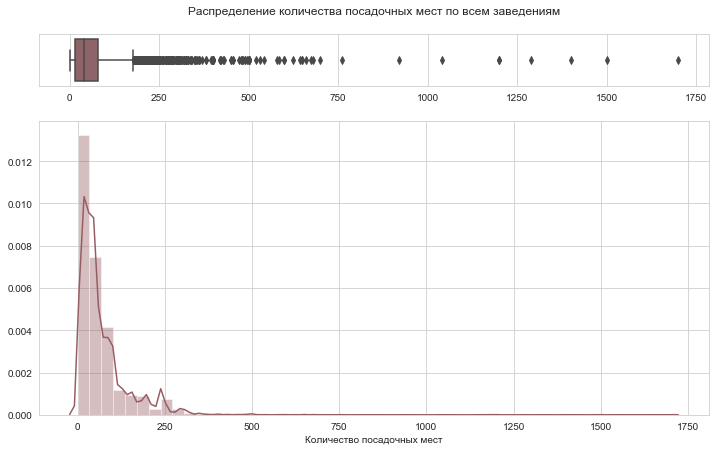

In [32]:
# Распределение количества посадочных мест по всем заведениям

# Разделение фигуры на две части
fig, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12, 7))
 
# Добавление графика к каждой части
sns.boxplot(df['number'], ax = ax_box, color = '#965d62')
sns.distplot(df['number'], ax = ax_hist, color = '#965d62')

# Настройки графика
ax_box.set_title('Распределение количества посадочных мест по всем заведениям',  pad = 20)
ax_box.set_xlabel('')
ax_hist.set_xlabel('Количество посадочных мест')

plt.show()


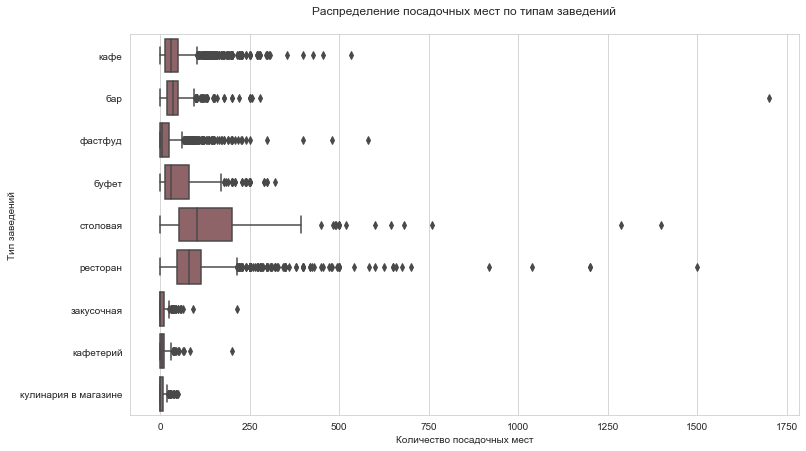

In [33]:
# Построение графика распределений посадочных мест по типам заведений

# Настройки фигуры
plt.figure(figsize = (12, 7))

ax = sns.boxplot(data = df, x = 'number', y = 'object_type', color = '#965d62')

# Настройки графика
plt.title('Распределение посадочных мест по типам заведений', pad = 20)
plt.xlabel('Количество посадочных мест')         
plt.ylabel('Тип заведений')

plt.show()

Можно заметить сильные выбросы у заведений типа бар, столовая и ресторан.

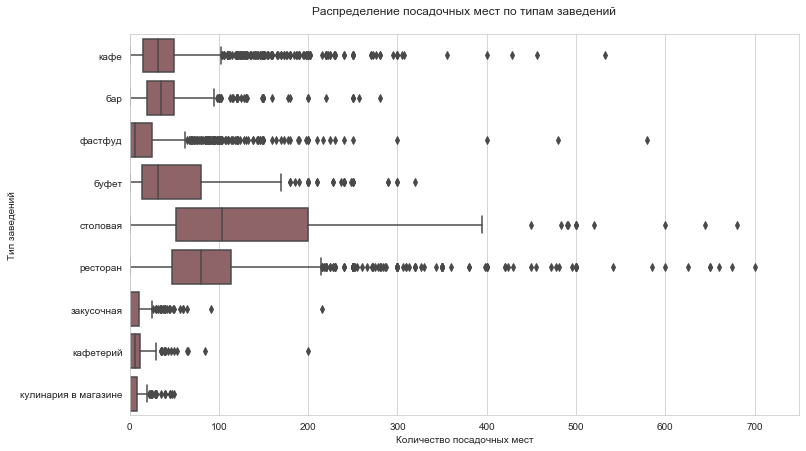

In [34]:
# Построение графика распределений посадочных мест по типам заведений без крупных выбросов

# Настройки фигуры
plt.figure(figsize=(12, 7))

ax = sns.boxplot(data = df, x = 'number', y = 'object_type', color = '#965d62')

# Настройки графика
plt.title('Распределение посадочных мест по типам заведений', pad = 20)
plt.xlabel('Количество посадочных мест')         
plt.ylabel('Тип заведений')
plt.xlim(0, 750)

plt.show()

На графике видно, что в среднем большое количество посадочных мест характерно для заведений типа столовая, на втором месте идут заведения типа ресторан. Маленькое количество посадочных мест характерно для заведений типа закусочная, кафетерий, кулинария в магазине.  
Посчитаем медианные средние и построим график, для подтверждения данных.


In [35]:
object_type_by_number = df.groupby('object_type')['number'].median().reset_index().sort_values(by = 'number', ascending = False)

In [36]:
object_type_by_number

,object_type,number
7,столовая,103
6,ресторан,80
0,бар,35
1,буфет,32
3,кафе,32
4,кафетерий,6
8,фастфуд,6
2,закусочная,0
5,кулинария в магазине,0


In [37]:
np.arange(object_type_by_number['number'].min(), 
          object_type_by_number['number'].max() + 1, 5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100], dtype=int64)

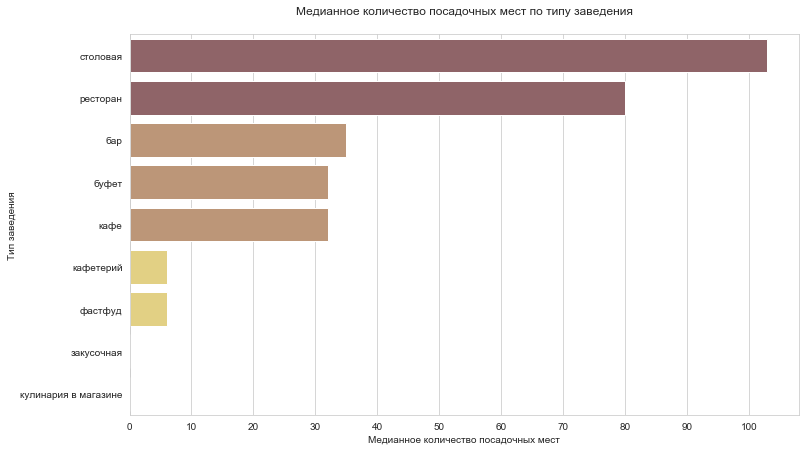

In [38]:
# Построение графика отношения количества сетевых заведений к общему числу заведений

# Настройка фигуры
plt.figure(figsize = (12, 7))
palette = ['#965d62' if (x >= 80) else '#c7956d' if (30 < x < 80) else '#f2d974' for x in object_type_by_number['number']]

ax = sns.barplot(data = object_type_by_number, 
                 x = 'number',
                 y = 'object_type', 
                 palette = palette)

          
# Настройка графика
plt.xticks(np.arange(object_type_by_number['number'].min(), 
          object_type_by_number['number'].max() + 1, 10))

plt.title('Медианное количество посадочных мест по типу заведения', pad = 20)
plt.xlabel('Медианное количество посадочных мест')    
plt.ylabel('Тип заведения')

plt.show()

Условно по медианному количеству посадочных мест можно разделить типы заведений на 4 группы:
1. Большое количество посадочных мест: столовые и рестораны (больше 80);
2. Среднее количество посадочных мест: бары, буфеты, кафе (в среднем около 35 посадочных мест);
3. Небольшое количество посадочных мест: кафетерии и фастфуды (в среднем около 5 посадочных мест);
4. Чаще всего отсутствуют посадочные места отсутствуют: закусочные и отдел кулинарии в магазине. 

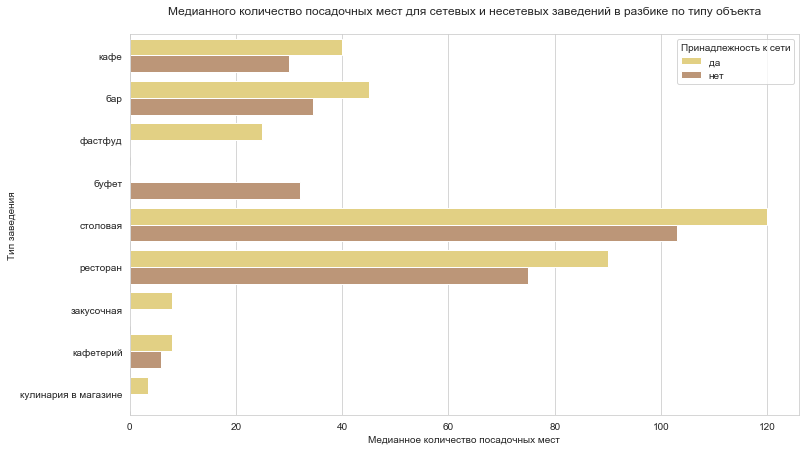

In [39]:
# Построение графика медианного количества мест для сетевых и несетевых заведений в разбике по типу объекта

plt.figure(figsize = (12, 7))
palette = {"да": "#f2d974", "нет": "#c7956d"}

ax = sns.barplot(data= df, x='number', y='object_type', hue='chain', 
            ci = None, estimator = median, palette = palette)

plt.title('Медианного количество посадочных мест для сетевых и несетевых заведений в разбике по типу объекта', pad = 20)
plt.xlabel('Медианное количество посадочных мест')    
plt.ylabel('Тип заведения')

# Настройка легенды
plt.legend(title = 'Принадлежность к сети')
leg = ax.get_legend()
leg._legend_box.align = 'left'

plt.show()

Можно отметить, что для сетевых заведений медианное количество мест немного превышает медианное количество мест для несетевых заведений. Особенно это ярко выражено для заведений типа _фастфуд_.   
Исключение составляют заведения типа _буфет_. Но скорее всего здесь сказывается то, что буфеты редко бывают сетевыми.


<a id='step2.6'></a>
### 6. Выделите в отдельный столбец информацию об улице из столбца address 

In [40]:
# Просмотр примеров обозначений улиц
df.address.sample(10)

4115     город Москва, улица Москворечье, дом 31, корпус 2
4609                  город Москва, Донецкая улица, дом 33
13654    город Москва, 4-я Тверская-Ямская улица, дом 6/12
3523        город Москва, Тверская улица, дом 18, корпус 1
13958            город Москва, Юрьевский переулок, дом 16А
14686                 город Москва, Боровское шоссе, дом 6
105      город Москва, Коктебельская улица, дом 11, стр...
1808     город Москва, 1-й Нагатинский проезд, дом 11, ...
451           город Москва, Комсомольский проспект, дом 17
12148    город Москва, Днепропетровская улица, дом 3, к...
Name: address, dtype: object

In [41]:
# Словарь с типами улиц, а также с типами населенных пунктов Новой Москвы
streets_dict = ['улица', 'проспект', 'переулок', 'проезд', 'набережная', 'шоссе', 'аллея', 'бульвар',
                'площадь', 'тупик', 'линия', 'квартал', 'мост', 'территория', 'просек', 'посёлок', 
                'город Зеленоград', 'город Московский', 'город Троицк', 'поселение', 'микрорайон', 'километр']

In [42]:
# Функция выделения улицы из строки с адресом
def extract_street(address):
    for element in address.split(', '):
        for street_type in streets_dict:
            if element.find(street_type)!= -1:
                return(element)

# Применение функции к стобцу с адресом
df['street'] = df['address'].apply(extract_street)

In [43]:
# Проверка пустых значений
df['street'].isnull().sum()

0

In [44]:
# Проверка таблицы
df.sample(10)

,id,object_name,chain,object_type,address,number,street
13431,193785,пицца паоло,да,кулинария в магазине,"город Москва, Пятницкое шоссе, дом 43",0,Пятницкое шоссе
1801,70614,кафе-кондитерская «селезнефф»,нет,кафе,"город Москва, микрорайон Северное Чертаново, д...",24,микрорайон Северное Чертаново
13695,221535,напитки,нет,бар,"город Москва, улица Кузнецкий Мост, дом 19, ст...",30,улица Кузнецкий Мост
14484,217710,кофе пью,нет,кафе,"город Москва, Гамсоновский переулок, дом 2, ст...",38,Гамсоновский переулок
7503,143849,предприятие быстрого обслуживания «макдоналдс»,да,фастфуд,"город Москва, Кантемировская улица, дом 47",90,Кантемировская улица
7321,29032,гбоу школа № 1636 «кдп»,нет,столовая,"город Москва, Елецкая улица, дом 12, корпус 3",240,Елецкая улица
4869,28481,столовая,нет,столовая,"город Москва, Вельяминовская улица, дом 9",48,Вельяминовская улица
3244,27382,гбоу школа №1519,нет,столовая,"город Москва, улица Исаковского, дом 14, корпус 3",246,улица Исаковского
1298,143092,19bar atmosphere,нет,бар,"город Москва, улица Покровка, дом 19",90,улица Покровка
417,22129,погребок,нет,кафе,"город Москва, Мясницкая улица, дом 22, строение 1",34,Мясницкая улица


<a id='step2.7'></a>
### 7. Постройте график топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?

In [45]:
# Топ 10 улиц по количеству заведений
df['street'].value_counts().head(10)

город Зеленоград          230
проспект Мира             196
Профсоюзная улица         181
Ленинградский проспект    172
Пресненская набережная    165
Варшавское шоссе          162
Ленинский проспект        148
поселение Сосенское       138
проспект Вернадского      126
Кутузовский проспект      114
Name: street, dtype: int64

В топ-10 попал город Зеленоград из Новой Москвы и поселение Сосенское, т.к. считать за улицу их никак нельзя, то исключим записи с г.Зеленоград и поселением Сосенским, после чего сохраним записи по топ-10 в отдельную таблицу и построим график.

In [46]:
top10_streets = df[(df['street'] != 'город Зеленоград') & (df['street'] != 'поселение Сосенское') ]['street'].value_counts().reset_index().head(10)

In [47]:
top10_streets.columns = ['street_name', 'objects_count']

In [48]:
top10_streets

,street_name,objects_count
0,проспект Мира,196
1,Профсоюзная улица,181
2,Ленинградский проспект,172
3,Пресненская набережная,165
4,Варшавское шоссе,162
5,Ленинский проспект,148
6,проспект Вернадского,126
7,Кутузовский проспект,114
8,Каширское шоссе,110
9,Кировоградская улица,107


In [49]:
# Доля заведений на популярных улиц от всех заведений Москвы
top10_streets['objects_count'].sum() / len(df)

0.09754972994335397

Почти 10% всех заведений Москвы находятся всего на 10 улицах.

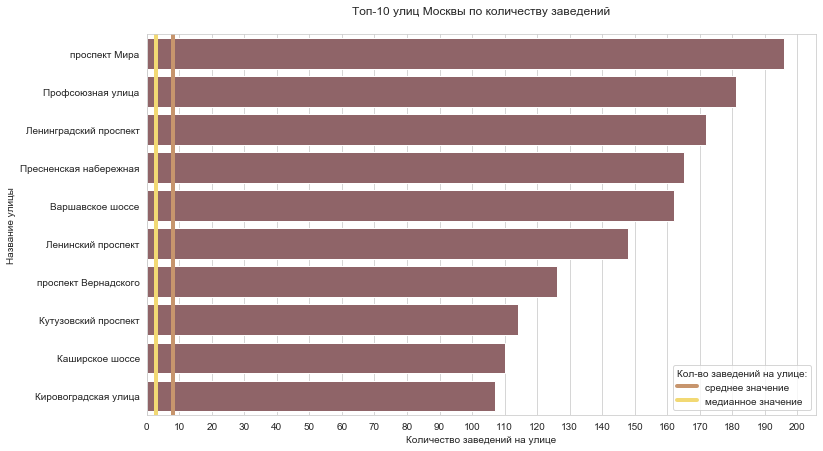

In [50]:
# Построение графика топ-10 улиц Москвы по количеству заведений

# Настройки фигуры
plt.figure(figsize=(12, 7))

ax = sns.barplot(data = top10_streets, 
                 x = 'objects_count',
                 y = 'street_name',
                 color = '#965d62')

# Среднее значение заведений на улице для всех улиц
plt.axvline(df.groupby('street')['id'].count().mean(), linewidth=4, color='#c7956d', label = 'cреднее значение')

# Медианное значение заведений на улице для всех улиц
plt.axvline(df.groupby('street')['id'].count().median(), linewidth=4, color='#f2d974', label = 'медианное значение')

# Настройки графика
plt.title('Топ-10 улиц Москвы по количеству заведений', pad = 20)
plt.xlabel('Количество заведений на улице')         
plt.ylabel('Название улицы')
plt.xticks((np.arange(0, top10_streets['objects_count'].max() + 10, 10)))

# Настройки легенды
plt.legend(title = 'Кол-во заведений на улице:')
leg = ax.get_legend()
leg._legend_box.align = 'left'

plt.show()

Можно отметить, что кол-во заведений на популярных улицах сильно превышает среднее и медианное кол-во заведений по всем улицам Москвы: на улицах топ-10 располагается более 100 заведений общественного питание, в то время как в среднем по всем улицам их не больше 10.

In [51]:
# Импторт списка улиц и их принадлежности к районам с сайта opengovdata
spreadsheet_id = '19yj3N6dCXHktdNw_IV-GqTW2XcxxZgtVNm5V_qiY3N0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))

streets.rename(columns={'streetname': 'street_name'}, inplace = True)
streets.head()

,street_name,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [52]:
# Объединение таблиц с топ-10 улицами и районами, через которые данные улицы проходят
top10_streets_vs_districts = top10_streets.merge(streets[['street_name', 'okrug', 'area']], 
                                                 how = 'left', 
                                                 on = 'street_name')

In [53]:
top10_streets_vs_districts.head()

,street_name,objects_count,okrug,area
0,проспект Мира,196,СВАО,Алексеевский район
1,проспект Мира,196,СВАО,Ярославский Район
2,проспект Мира,196,СВАО,Район Марьина роща
3,проспект Мира,196,СВАО,Останкинский район
4,проспект Мира,196,СВАО,Район Ростокино


In [54]:
# Определение районов, на которых размещаются улицы
print('Список топ-10 улиц и районов, в которых данные улица находятся')
print()
for street, data in top10_streets_vs_districts.groupby('street_name'):
    print(street, 'проходит через районы:')
    for element in data['area'].unique():
        print('·', element)
    print()

Список топ-10 улиц и районов, в которых данные улица находятся

Варшавское шоссе проходит через районы:
· Район Чертаново Центральное
· Район Чертаново Северное
· Район Чертаново Южное
· Донской район
· Район Нагатино-Садовники
· Нагорный район
· Район Северное Бутово
· Район Южное Бутово

Каширское шоссе проходит через районы:
· Район Москворечье-Сабурово
· Район Нагатино-Садовники
· Район Орехово-Борисово Южное
· Район Орехово-Борисово Северное

Кировоградская улица проходит через районы:
· Район Чертаново Центральное
· Район Чертаново Северное
· Район Чертаново Южное

Кутузовский проспект проходит через районы:
· Район Дорогомилово
· Район Фили-Давыдково

Ленинградский проспект проходит через районы:
· Район Аэропорт
· Район Беговой
· Хорошевский район
· Район Сокол

Ленинский проспект проходит через районы:
· Район Проспект Вернадского
· Район Тропарево-Никулино
· Донской район
· Район Гагаринский
· Ломоносовский район
· Обручевский район
· Район Теплый Стан
· Район Якиманка

Пресн

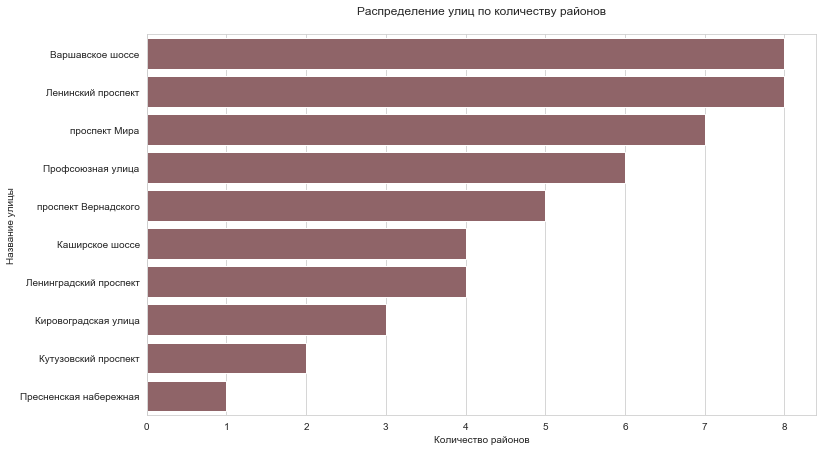

In [55]:
# Построение графика распределение улиц по количеству районов

# Расчет количества районов для каждой улицы
area_dist = top10_streets_vs_districts.groupby('street_name', as_index = False) \
                            .agg({'area' : 'count', 'okrug' : 'count', 'objects_count' : 'median'}) \
                            .sort_values('area', ascending = False)

# Настройки фигуры
plt.figure(figsize=(12, 7))

sns.barplot(data = area_dist, 
                 x = 'area',
                 y = 'street_name',
                 color = '#965d62')

# Настройки графика
plt.title('Распределение улиц по количеству районов', pad = 20)
plt.xlabel('Количество районов')         
plt.ylabel('Название улицы')

plt.show()

Можно отметить, что многие улицы, вошедшие в топ-10 довольно длинные, т.к. их расположение охватывает несколько округов.  Возможно именно это влияет на их попадание в топ-10 по числу находящихся на них заведений.

Посмотрим расположение улиц из топ 10 на карте Москвы.

In [56]:
# Распределение улиц по округам
top10_streets_vs_districts['okrug'].value_counts()

ЮАО     14
ЮЗАО    14
ЗАО      7
СВАО     6
САО      4
ЦАО      3
Name: okrug, dtype: int64

In [57]:
# Импорт библиотеки для запроса к геокодеру и для парсинга ответа
BASE_URL = 'https://geocode-maps.yandex.ru/1.x/'

# Функция поиска координат по наименованию улицы
def find_coords(street_name):
    
    # Добавляем к назвнии улицы г.Москва для корректного поиска
    street = 'г.Москва, {}'.format(street_name)
    
    # Отправка запроса и получение ответа от геокодера
    params = { 
        "apikey" : "***", 
        "geocode" : street
    }
    
    response = requests.get(BASE_URL, params=params)
    
    # Парсинг ответа и сохранение значения из первого тега <pos>
    soup = BeautifulSoup(response.text, 'html')
    pos = soup.find('pos')
    
    # Разделяем координаты и сохраняем их в параметры coord1 и coord2
    split_pos = pos.text.split(' ')
    coord1 = split_pos[0]
    coord2 = split_pos[1]
    
    return [coord1, coord2]

# Применение функции
top10_streets['coords'] = top10_streets['street_name'].apply(find_coords)

In [58]:
# Сохранение коордитан в разные столбцы
top10_streets['coord1'] = top10_streets['coords'].map(lambda x: x[0])
top10_streets['coord2'] = top10_streets['coords'].map(lambda x: x[1])

In [59]:
top10_streets

,street_name,objects_count,coords,coord1,coord2
0,проспект Мира,196,"[37.637937, 55.812368]",37.637937,55.812368
1,Профсоюзная улица,181,"[37.532511, 55.649525]",37.532511,55.649525
2,Ленинградский проспект,172,"[37.545626, 55.794285]",37.545626,55.794285
3,Пресненская набережная,165,"[37.540982, 55.746791]",37.540982,55.746791
4,Варшавское шоссе,162,"[37.603954, 55.599799]",37.603954,55.599799
5,Ленинский проспект,148,"[37.537137, 55.68263]",37.537137,55.68263
6,проспект Вернадского,126,"[37.515353, 55.681666]",37.515353,55.681666
7,Кутузовский проспект,114,"[37.50911, 55.735013]",37.50911,55.735013
8,Каширское шоссе,110,"[37.683194, 55.641244]",37.683194,55.641244
9,Кировоградская улица,107,"[37.605023, 55.614455]",37.605023,55.614455


In [60]:
# Настрока центра карты и масштаба
map = folium.Map(location=[55.7522, 37.6156], zoom_start = 10)

# Размещение координат на карте
def put_coords_on_map(row):
    folium.Marker(location=[row['coord2'], row['coord1']], icon=folium.Icon(color = 'beige')).add_to(map)
    
top10_streets.apply(put_coords_on_map, axis = 1)

map

Наибольшей популярностью по количеству заведений отличается юг и юго-запад Москвы. А вот наименьшей, похоже, пользуется восток Москвы: на востоке нет ни одной улицы из топ-10 улицы по количеству размещенных на ней заведений общественного питания. 

<a id='step2.8'></a>
### 8.	Найдите число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?

In [61]:
# Все улицы с одним заведением
one_object_street = df.groupby('street', as_index = False)['id'].count().query('id == 1')
one_object_street.head()

,street,id
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1


In [62]:
# Количество улиц с одним заведением
len(one_object_street)

543

In [63]:
# Доля улиц с одним заведением по отношению ко всем улицам
len(one_object_street) / len(df.groupby('street')['id'].count())

0.29130901287553645

Почти на 30% улиц из всех улиц Москвы находится всего 1 заведение общественного питания.

In [64]:
# Объединение таблиц с улицами с одним заведением и с районами, через которые данные улицы проходят
one_object_street_vs_districts = one_object_street.merge(streets[['street_name', 'area']], 
                                                         how = 'left', 
                                                         right_on = 'street_name',
                                                         left_on = 'street')

In [65]:
# Топ 10 районов по количеству улиц с одним заведением
one_object_street_vs_districts['area'].value_counts().head(10)

Таганский район        27
Район Хамовники        26
Басманный район        25
Тверской район         20
Пресненский район      20
Район Марьина роща     18
Район Арбат            18
Район Сокольники       15
Мещанский район        15
Район Замоскворечье    14
Name: area, dtype: int64

In [66]:
# Список всех районов, где есть улицы с 1 заведением
print('Все районы, где есть улицы с 1 заведением:')
for i in one_object_street_vs_districts[~one_object_street_vs_districts ['area'].isnull()]['area'].sort_values().unique():
    print('·', i)
print()    
print('Всего районов, где есть улицы с 1 заведением:', len(one_object_street_vs_districts['area'].unique()))

Все районы, где есть улицы с 1 заведением:
· Алексеевский район
· Алтуфьевский район
· Бабушкинский район
· Басманный район
· Бескудниковский Район
· Бутырский район
· Войковский Район
· Головинский район
· Даниловский район
· Дмитровский район
· Донской район
· Красносельский район
· Лосиноостровский район
· Мещанский район
· Можайский Район
· Молжаниновский район
· Нагорный район
· Нижегородский район
· Обручевский район
· Останкинский район
· Пресненский район
· Район Арбат
· Район Аэропорт
· Район Беговой
· Район Бирюлево Восточное
· Район Богородское
· Район Внуково
· Район Восточное Измайлово
· Район Восточный
· Район Выхино-Жулебино
· Район Гагаринский
· Район Гольяново
· Район Дорогомилово
· Район Замоскворечье
· Район Западное Дегунино
· Район Зюзино
· Район Ивановское
· Район Измайлово
· Район Коньково
· Район Коптево
· Район Косино-Ухтомский
· Район Котловка
· Район Крюково
· Район Кузьминки
· Район Кунцево
· Район Куркино
· Район Левобережный
· Район Лефортово
· Район Лиано

Можно заметить, что в списке встречаются районы в центре Москвы, причем по числу улиц с одним заведением они лидируют у районов по окраинам. Это можно обяснить тем, что в центре Москвы очень часто встречаются короткие улицы, также одна улица может проходить через 2, или даже три района.

<a id='step2.9'></a>
### 9.  Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [67]:
# Срез данных из исходной таблицы по улицам из топ-10
df_top10_streets = df.query('street in @top10_streets.street_name')

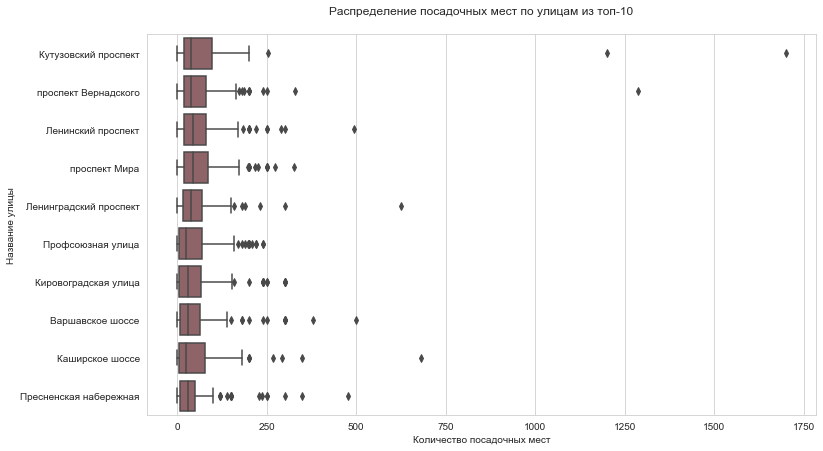

In [68]:
# Построение графика распределений посадочных мест по улицам из топ-10

# Настройки фигуры
plt.figure(figsize = (12, 7))

ax = sns.boxplot(data = df_top10_streets, x = 'number', y = 'street', color = '#965d62')

# Настройки графика
plt.title('Распределение посадочных мест по улицам из топ-10', pad = 20)
plt.xlabel('Количество посадочных мест')         
plt.ylabel('Название улицы')

plt.show()

На графике заметны сильные выбросы для улиц Кутузовский проспект и проспект Вернадоского.  
Увеличим масштаб графика, чтобы лучше увидеть распределение, а также добавим распределение по остальным улицам, не входящим в топ-10.

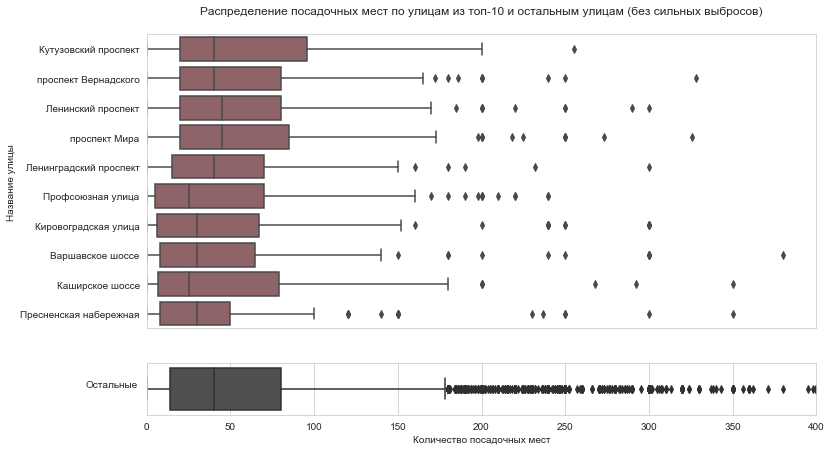

In [69]:
# Построение графика распределений посадочных мест 

# Настройки фигуры: разделение фигуры на две части
fig, (ax_top, ax_all) = plt.subplots(2, gridspec_kw={"height_ratios": (.85, .15)}, figsize=(12, 7))


# Добавление графика к каждой части
sns.boxplot(data = df_top10_streets, x = 'number', y = 'street', ax = ax_top, color = '#965d62')
sns.boxplot(df[~df['street'].isin(top10_streets['street_name'])]['number'], ax = ax_all, color = '#534e52')


# Настройки графика
ax_top.set_title('Распределение посадочных мест по улицам из топ-10 и остальным улицам (без сильных выбросов)',  pad = 20)
ax_top.set_xlabel('')
ax_top.set_ylabel('Название улицы')
ax_top.set_xlim(0, 400)
ax_top.set_xticks([])


ax_all.set_xlabel('Количество посадочных мест')
ax_all.set_ylabel('Остальные', rotation = 0, labelpad = 28)
ax_all.set_xlim(0, 400)

plt.show()

In [70]:
# Медианное кол-во посадочных мест для каждой улицы
df_top10_streets.groupby('street')['number'].median().sort_values(ascending = False)

street
проспект Мира             45
Ленинский проспект        45
проспект Вернадского      40
Ленинградский проспект    40
Кутузовский проспект      40
Пресненская набережная    30
Кировоградская улица      30
Варшавское шоссе          30
Профсоюзная улица         25
Каширское шоссе           25
Name: number, dtype: int64

Распределение посадочных мест на топ-10 и на остальных улицах более менее похожи. Медианное число мест колеблется от 25 до 40.

In [71]:
# Медианное кол-во мест для улиц из топ-10 и для всех улиц
print('Медианное кол-во мест для улиц из топ-10:', df_top10_streets['number'].median())
print('Медианное кол-во мест для остальных улиц:', df[~df['street'].isin(top10_streets['street_name'])]['number'].median())
print('Медианное кол-во мест для всех улиц:', df['number'].median())

Медианное кол-во мест для улиц из топ-10: 40.0
Медианное кол-во мест для остальных улиц: 40.0
Медианное кол-во мест для всех улиц: 40.0


<a id='step3'></a>
## Шаг 3. Общий вывод

### Результаты исследований

* **Типы заведений**

Самый распространенный тип заведений общественного питания - кафе (почти 40%).   
Заведения типа столовые, рестораны и фастфуд составляют вместе около 45% от всех заведений.   
На все остальные типы приходится около 15% заведений.

* **Принадлежность к сети**

Для Москвы более характерны несетевые заведения (80,6% несетевых к 19,4% сетевых).    
Принадлежность к сети более характерна для заведений типа фастфуд (более 40% принадлежат сетям), в то время как сети совсем не характерны для баров, буфетов и столовых.  
Характерная черта сетевых заведений в Москве - мало заведений с большим количеством посадочных мест.

* **Посадочные места**

По медианному количеству посадочных мест можно условно все заведения разделить на 4 группы
1. Большое количество посадочных мест: столовые и рестораны (больше 80);
2. Среднее количество посадочных мест: бары, буфеты, кафе (около 35);
3. Небольшое количество посадочных мест: кафетерии и фастфуды (около 5);
4. Чаще всего отсутствуют посдаочные места отсутствуют: закусочные и отдел кулинарии в магазине. 

Можно отметить, что для сетевых заведений медианное количество мест немного превышает медианное количество мест для несетевых заведений.

Распределение посадочных мест на топ-10 и на остальных улицах Москвы более менее похожи.     
Медианное число мест колеблется от 25 до 40.

* **Расположение**

Топ 10 улиц в Москве по количеству заведений:  
  1. проспект Мира	        196
  2. Профсоюзная улица	    181
  3. Ленинградский проспект	172
  4. Пресненская набережная	165
  5. Варшавское шоссе	    162
  6. Ленинский проспект	    148
  7. проспект Вернадского	126
  8. Кутузовский проспект	114
  9. Каширское шоссе	    110
  10. Кировоградская улица	107

Почти 10% всех заведений Москвы находятся всего на 10 улицах (составляют менее 1% всех улиц в Москве), в то время как на 30% улиц из всех улиц Москвы находится всего 1 заведение общественного питания. 

Количество заведений на популярных улицах сильно превышает среднее количество заведений по всем улицам Москвы: на улицах топ-10 располагается более 100 заведений общественного питание, в то время как в среднем по всем улицам их не больше 10.  

Многие улицы, вошедшие в топ-10 довольно длинные, т.к. их расположение охватывает несколько районов и даже округов. 

Наибольшей популярностью по количеству заведений отличается юг и юго-запад Москвы. Наименьшей - восток Москвы: на востоке нет ни одной улицы из топ-10 улицы по количеству размещенных на ней заведений общественного питания.

### Рекомендации

Для принятия каких-либо решений данных очень мало.
Для открытия кафе можно использовать типичный паттерн заведений Москвы: несетевое кафе на юге/юго-западе Москвы (на одной или близлежащих из ТОП-10 улиц) на 30-40 посадочных мест.

Однако стоит подробнее изучить ряд критериев.

Какой может быть план действий:

1. Исследовать успешные и провальные проекты для заведений. Посмотреть, что привело их к этому? Заведения каких форматов чаще имеют успех и какие типы заведений сейчас популярны?    

2. Определиться с целевой аудиторией и типом (форматом) заведения, после чего изучить конкурентов:  
    * местоположение,
    * поток пользователей,
    * средний чек
3. После определения выгодного местоположения:
    * спрогнозировать месячную выручку 

<a id='step4'></a>
## Презентация

Ссылка: https://drive.google.com/file/d/1JKWN9GT8ZOFj5FNhWyh6jYDZk8-2oO5j/view?usp=sharing